
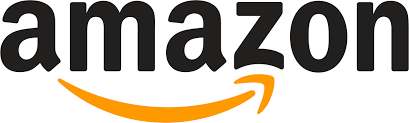
# Sentiment Analysis
Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) task that involves analyzing and determining the sentiment or opinion expressed in a piece of text, such as a customer review, social media post, or survey response. The goal of sentiment analysis is to understand and classify the subjective information conveyed in the text as positive, negative, or neutral.

In a sentiment analysis project, you typically work with a dataset containing text data and corresponding sentiment labels (e.g., positive, negative, neutral). The project involves several steps, including data cleaning and preprocessing, feature extraction (such as converting text to numerical representations), model training, and evaluation.

We are going to do this with the data we have from user comments on the Amazon site and building a machine learning model.
  This dataset contains 20,000 comments from the Amazon site about various products and programs. Each of these data has a label.
positive means a positive opinion or negative means a negative opinion. (ignoring neutral opinions)


### General stages of the project:

1. **Dataset**: Obtain a dataset with customer comments and sentiment labels. You can search for publicly available sentiment analysis datasets online or create your own dataset by collecting customer comments and manually labeling them as positive or negative sentiment.

2. **Data Preprocessing**: Preprocess your dataset by removing unnecessary columns, handling missing values, cleaning text (e.g., removing punctuation, converting to lowercase), and performing other necessary preprocessing steps.

3. **Train-Test Split**: Split your dataset into training and testing sets using a method like `train_test_split` from scikit-learn. This allows you to evaluate your model's performance on unseen data.

4. **Feature Extraction**: Use techniques like CountVectorizer or TF-IDF vectorization to convert the text data into numerical feature vectors. This step will help transform the text data into a format that can be used by machine learning models.

5. **Model Selection and Training**: Choose a suitable machine learning model (e.g., Logistic Regression, Naive Bayes, SVM) or a deep learning model (e.g., RNN, Transformer) for sentiment analysis. Train the selected model on the training data using appropriate training techniques and hyperparameter tuning.

6. **Model Evaluation**: Evaluate your trained model on the testing data by making predictions and comparing them with the ground truth sentiment labels. Calculate evaluation metrics such as accuracy, precision, recall, F1-score, or ROC-AUC to assess the model's performance.

7. **Model Deployment**: If the model meets your desired performance, you can deploy it to make predictions on new, unseen customer comments. This could be in the form of a web application, API, or integration with your existing system.


In [1]:
# installing required library
!pip install pandas 
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install Scikit-learn
!pip install nltk

In [39]:
# required libraries
import pandas as pd
import numpy as np
import pickle # to Save & Load the Model
import seaborn as sns # Data visualization 
import matplotlib.pyplot as plt # Data visualization

import re #regex
import nltk # tokenization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer # Vectorization 
from sklearn.model_selection import train_test_split #train_test split
from sklearn.linear_model import LogisticRegression #ML model
from sklearn.svm import SVC #ML model
from sklearn.neighbors import KNeighborsClassifier #ML model
from sklearn.tree import DecisionTreeClassifier #ML model
from sklearn.naive_bayes import MultinomialNB #ML model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # Evaluate the model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay


In [20]:
df = pd.read_csv('Amazon_DataSet.csv') # Make Dataframe

In [21]:
df.tail(10) # Sentiment is Target

,reviewText,Sentiment
19990,"you do not have to buy gems. plus, you start o...",Positive
19991,great interactive game love playing it and so ...,Positive
19992,I love this app! cant get enough of it. its al...,Positive
19993,"If I could rate 1,000,000,000,000,000,000,000 ...",Positive
19994,I hate it! I barely played it for 40 sec. befo...,Negative
19995,this app is fricken stupid.it froze on the kin...,Negative
19996,Please add me!!!!! I need neighbors! Ginger101...,Positive
19997,love it! this game. is awesome. wish it had m...,Positive
19998,I love love love this app on my side of fashio...,Positive
19999,This game is a rip off. Here is a list of thin...,Negative


In [22]:
df.info() # Dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Sentiment   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [23]:
df.isnull().sum() # find missing values

reviewText    0
Sentiment     0
dtype: int64

In [24]:
# Change Target dtype to int
df['Sentiment'] = df['Sentiment'].replace('Positive' , 1)
df['Sentiment'] = df['Sentiment'].replace('Negative' , 0)

In [25]:
df.tail(10)

,reviewText,Sentiment
19990,"you do not have to buy gems. plus, you start o...",1
19991,great interactive game love playing it and so ...,1
19992,I love this app! cant get enough of it. its al...,1
19993,"If I could rate 1,000,000,000,000,000,000,000 ...",1
19994,I hate it! I barely played it for 40 sec. befo...,0
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1
19999,This game is a rip off. Here is a list of thin...,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Sentiment   20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [27]:
# Define X,Y
X = df['reviewText']
Y = df['Sentiment']

### Data Preprocessing:

To clean the text in your dataset, we can perform several preprocessing steps to remove noise, standardize the text, and make it suitable for analysis. Here are some common text cleaning techniques we can apply:

1. **Lowercasing**: Convert the text to lowercase to ensure consistency. This helps in treating words with different cases as the same word.

2. **Removing Punctuation**: Remove punctuation marks from the text, as they usually do not contribute much to sentiment analysis. You can use regular expressions or the `string` module in Python to achieve this.

3. **Tokenization**: Split the text into individual words or tokens. Tokenization helps in breaking down the text into meaningful units for analysis. You can use libraries like NLTK or spaCy for tokenization.

4. **Stop Word Removal**: Remove common words that do not carry much meaning, such as "the," "is," "and," etc. These words are called stop words and can be removed using libraries like NLTK or spaCy.

5. **Removing Numbers**: If numbers in the text do not provide any relevant information for sentiment analysis, you can remove them using regular expressions.

6. **Handling URLs and Special Characters**: If your dataset contains URLs, special characters, or emojis, you may choose to remove or replace them to avoid noise in the text.

7. **Stemming or Lemmatization**: Reduce words to their root form using stemming or lemmatization techniques. Stemming reduces words to their base form, while lemmatization aims to reduce words to their dictionary form. Libraries like NLTK or spaCy offer functions for these operations.

Here's a sample code snippet demonstrating some of these text cleaning steps using the NLTK library:

```python
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text
```

We can apply the `clean_text` function to your dataset's comment column to preprocess the text before further analysis.

```python

    X_clean = X.apply(clean_text) #applying "clean_text"  to column "X"
    
```

In [28]:
# Define a function to clean the data
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and numbers
    text = text.lower() # Convert to lowercase
    tokens = word_tokenize(text) # Tokenize the text
    stop_words = set(stopwords.words('english')) # Remove stop words
    
    tokens = [token for token in tokens if token not in stop_words]
    clean_text = ' '.join(tokens) # Join tokens into a clean text
    
    return clean_text


[nltk_data] Downloading package stopwords to C:\Users\Kasra
[nltk_data]     Tehrani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Kasra
[nltk_data]     Tehrani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
X = X.apply(clean_text) #applying function "clean_text"  to column "X"

## Train_Test_Split

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

## Feature Extraction

### What is n_gram?
An n-gram is a contiguous sequence of n items from a given sample of text. In the context of text analysis, items are typically words. So, a unigram (n=1) refers to a single word, a bigram (n=2) refers to a sequence of two consecutive words, and so on.

By setting `ngram_range=(1, 2)`, you are instructing the `CountVectorizer` to include both unigrams (single words) and bigrams (two-word sequences) when converting text into vectors.

Here's an example to illustrate the concept:

Input text: "I love this product"

With `ngram_range=(1, 2)`, the resulting vector representation would include the following n-grams:

- Unigrams: "I", "love", "this", "product"
- Bigrams: "I love", "love this", "this product"

Including both unigrams and bigrams allows the model to capture not only the individual words but also the contextual information provided by word sequences. This can potentially capture more nuanced relationships between words and improve the representation of the text data.

By adjusting the `ngram_range` parameter, you can control the size and complexity of the n-grams considered during vectorization. For example, setting `ngram_range=(1, 3)` would include unigrams, bigrams, and trigrams (sequences of three words) in the vectorization process.

It's worth noting that including higher-order n-grams can increase the dimensionality of the feature space and may require more computational resources and memory. The optimal choice of the `ngram_range` depends on the specific characteristics of your text data and the requirements of your sentiment analysis task.

In [31]:
# Vectorize text data (Column 'X')
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## Model Selection and Training

In [32]:
#1 Logistic regression Model
lm = LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression()

In [33]:
prediction = lm.predict(X_test)

In [34]:
accuracy_score(Y_test,prediction) # or this script "lm.score(X_test,Y_test)"

0.90175

In [35]:
print(classification_report(Y_test,prediction)) # metrics report

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       975
           1       0.92      0.96      0.94      3025

    accuracy                           0.90      4000
   macro avg       0.88      0.84      0.86      4000
weighted avg       0.90      0.90      0.90      4000



### What is a Confusion Matrix?
A confusion matrix is a technique for summarizing the performance of a classification algorithm.
Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.
Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.

In [36]:
confusion_matrix(Y_test,prediction)

array([[ 711,  264],
       [ 129, 2896]], dtype=int64)

In [37]:
# define a function to plot confusion matrix (optional)

def plot_confusion_matrix(y_test,prediction):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test,prediction)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive'])

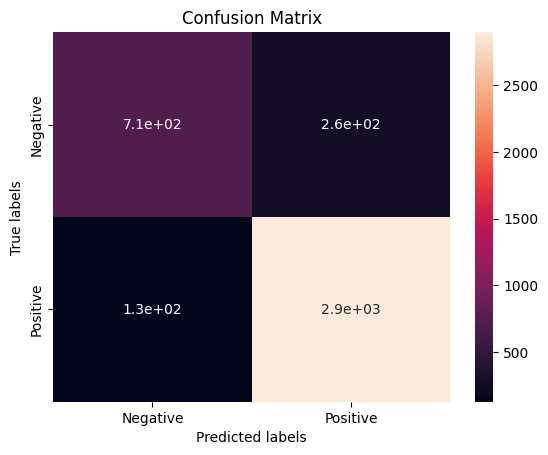

In [40]:
plot_confusion_matrix(Y_test,prediction)

### What is ROC Curve?
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

1-True Positive Rate
2-False Positive Rate

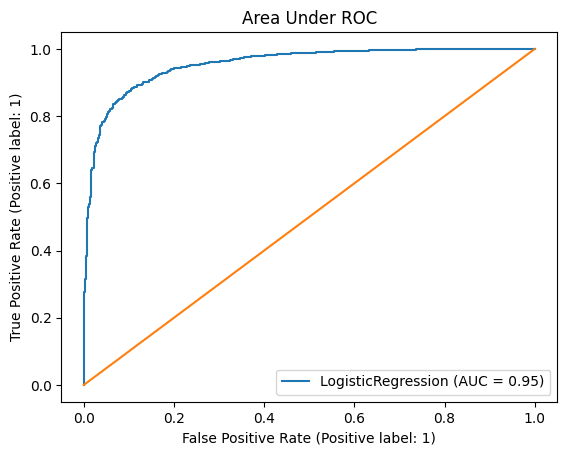

In [41]:
RocCurveDisplay.from_estimator(lm,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC');

In [42]:
#2 Support Vector Machine Model
svm = SVC()
svm.fit(X_train,Y_train)

SVC()

In [43]:
svm.score(X_test,Y_test)

0.89875

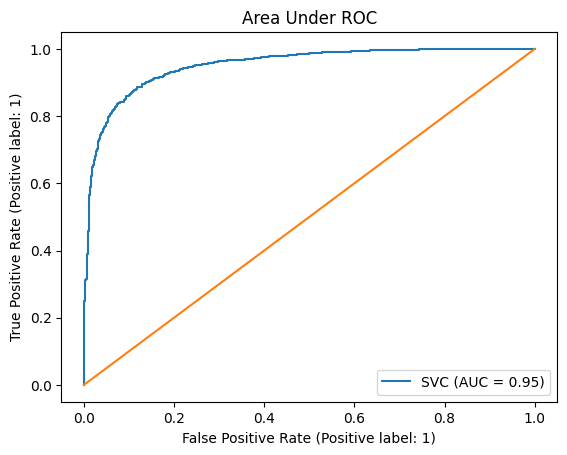

In [44]:
RocCurveDisplay.from_estimator(svm,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC');

In [45]:
#3 KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [46]:
knn.score(X_test,Y_test)

0.40175

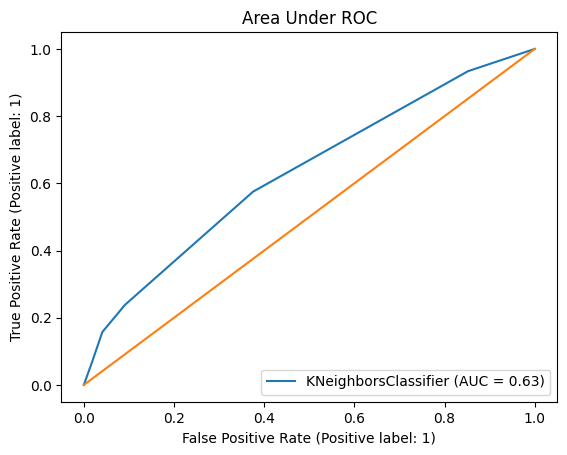

In [47]:
RocCurveDisplay.from_estimator(knn,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC');

In [48]:
#4 Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [49]:
tree.score(X_test,Y_test)

0.833

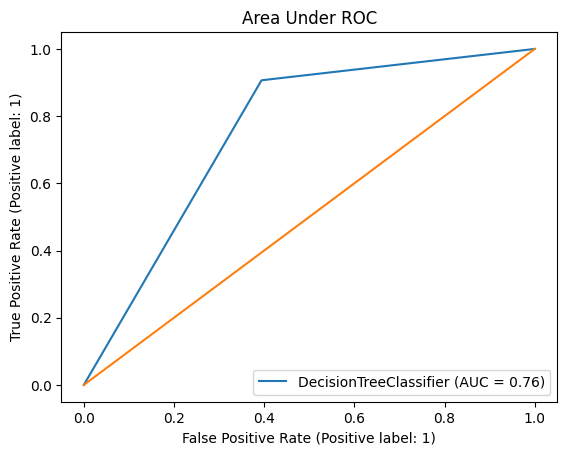

In [50]:
RocCurveDisplay.from_estimator(tree,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC');

In [51]:
#5 Naive Bayes Model
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)

MultinomialNB()

In [52]:
mnb.score(X_test,Y_test)

0.8665

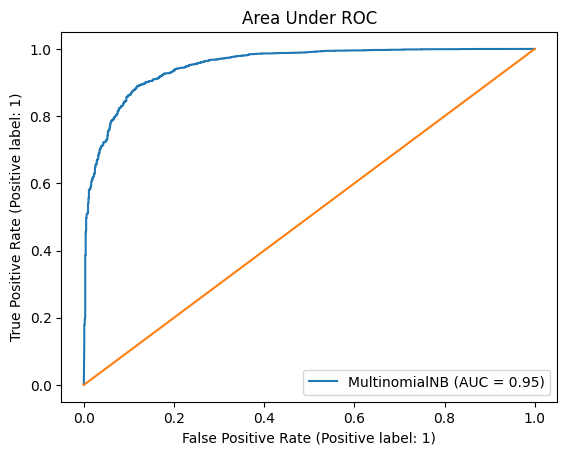

In [53]:
RocCurveDisplay.from_estimator(mnb,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC');

In [54]:
#6 Random forest Model
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [55]:
rf.score(X_test,Y_test)

0.8535

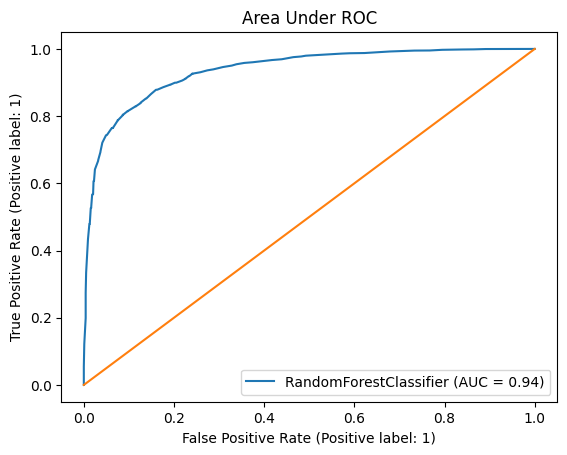

In [56]:
RocCurveDisplay.from_estimator(rf,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC');

# Model Evaluation
### Find the method performs best

In [57]:
accu = []
methods = []
accu.append(lm.score(X_test,Y_test))
methods.append('Logistic Regression')
accu.append(knn.score(X_test,Y_test))
methods.append('k nearest neighbors')
accu.append(svm.score(X_test,Y_test))
methods.append('Support Vector Machine')
accu.append(tree.score(X_test,Y_test))
methods.append('Decision Tree')
accu.append(mnb.score(X_test,Y_test))
methods.append('Naive Bayes')
accu.append(rf.score(X_test,Y_test))
methods.append('Random Forest')

In [58]:
for method , accuracy in enumerate(accu):
    print(methods[method],accuracy*100) #Accuracy Percentage %

Logistic Regression 90.17500000000001
k nearest neighbors 40.175
Support Vector Machine 89.875
Decision Tree 83.3
Naive Bayes 86.65
Random Forest 85.35000000000001


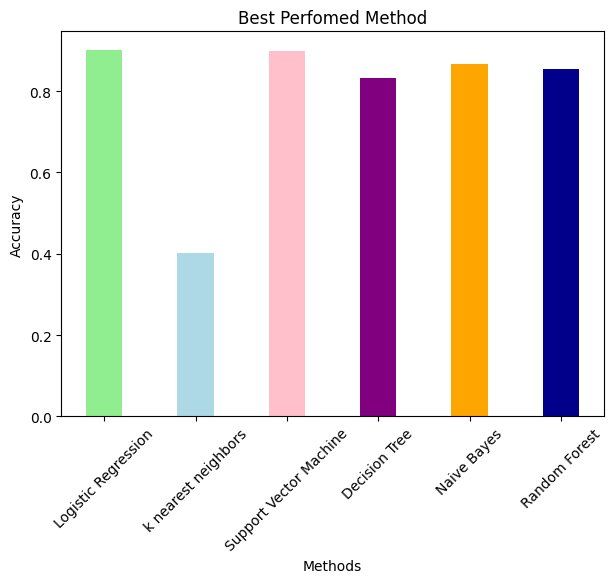

In [59]:
#Drawing a diagram with matplotlib
fig = plt.figure(figsize = (7,5))
 
# creating the bar plot
color = ['lightgreen','lightblue','pink','purple','orange','darkblue']
plt.bar(methods, accu, color =color, width = 0.4, )
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

***As we have seen in the above diagram, model Logistic Regression is better than all models in terms of accuracy.**

## Model Deployment

In [60]:
pickle.dump(lm, open('sentiment_analysis.pkl','wb'))

In [61]:
model = pickle.load(open('sentiment_analysis.pkl','rb'))

In [62]:
# Define a function to deploy new comment
def predict_sentiment(comment):
    # Preprocess the comment
    cleaned_comment = clean_text(comment) # The "clean_text()" function is already defined 

    # Convert the comment to a vector
    comment_vector = vectorizer.transform([cleaned_comment])

    # Make the prediction
    sentiment = model.predict(comment_vector)[0]
    if sentiment == 1:
        sentiment = 'Positive (+)'
    else:
        sentiment = 'Negative (-)'

    print( "Customer sentiment is ", sentiment)

In [ ]:
comment = input('Please leave your comment:')
predict_sentiment(comment)

In [ ]:
comment

*Written by Kasra Tehrani* - 
*kasra.n.tehrani@gmail.com* - 
*Good luck!*